# Predicting players rating

In this project you are going to predict the overall rating of soccer player based on their attributes
such as 'crossing', 'finishing etc.

The dataset you are going to use is from European Soccer Database
(https://www.kaggle.com/hugomathien/soccer) has more than 25,000 matches and more than
10,000 players for European professional soccer seasons from 2008 to 2016.

# About the Dataset

## The ultimate Soccer database for data analysis and machine learning

The dataset comes in the form of an SQL database and contains statistics of about 25,000 football
matches, from the top football league of 11 European Countries. It covers seasons from 2008 to
2016 and contains match statistics (i.e: scores, corners, fouls etc...) as well as the team formations,
with player names and a pair of coordinates to indicate their position on the pitch.

+25,000 matches

+10,000 players

11 European Countries with their lead championship

Seasons 2008 to 2016

Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates

Team line up with squad formation (X, Y coordinates)

Betting odds from up to 10 providers

Detailed match events (goal types, possession, corner, cross, fouls, cards etc...) for +10,000 matches

The dataset also has a set of about 35 statistics for each player, derived from EA Sports' FIFA video
games. It is not just the stats that come with a new version of the game but also the weekly
updates. So for instance if a player has performed poorly over a period of time and his stats get
impacted in FIFA, you would normally see the same in the dataset.

## Import Libraries

In [1]:
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
%matplotlib inline

## Read Data from the Database into pandas

In [2]:
# Create your connection.
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [3]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


## Exploring data

In [4]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,183978.0,91989.500000,53110.018250,1.0,45995.25,91989.5,137983.75,183978.0
player_fifa_api_id,183978.0,165671.524291,53851.094769,2.0,155798.00,183488.0,199848.00,234141.0
player_api_id,183978.0,135900.617324,136927.840510,2625.0,34763.00,77741.0,191080.00,750584.0
overall_rating,183142.0,68.600015,7.041139,33.0,64.00,69.0,73.00,94.0
potential,183142.0,73.460353,6.592271,39.0,69.00,74.0,78.00,97.0
crossing,183142.0,55.086883,17.242135,1.0,45.00,59.0,68.00,95.0
finishing,183142.0,49.921078,19.038705,1.0,34.00,53.0,65.00,97.0
heading_accuracy,183142.0,57.266023,16.488905,1.0,49.00,60.0,68.00,98.0
short_passing,183142.0,62.429672,14.194068,3.0,57.00,65.0,72.00,97.0
volleys,181265.0,49.468436,18.256618,1.0,35.00,52.0,64.00,93.0


## Data Cleaning: Handling Missing Data

In [6]:
#checking presenting of null values in data
df.isnull().any().any()

True

In [7]:
#Now let’s try to find how many data points in each column are null.
df.isnull().sum(axis=0)

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

## Fixing Null Values by Deleting Them

In [8]:
#deleting all null values
df = df.dropna()
df.isnull().any().any()

False

In [9]:
for col in df.columns:
    unique_cat = len(df[col].unique())
    print("{col}--> {unique_cat}..{typ}".format(col=col, unique_cat=unique_cat, typ=df[col].dtype))

id--> 180354..int64
player_fifa_api_id--> 10410..int64
player_api_id--> 10410..int64
date--> 197..object
overall_rating--> 61..float64
potential--> 56..float64
preferred_foot--> 2..object
attacking_work_rate--> 8..object
defensive_work_rate--> 18..object
crossing--> 95..float64
finishing--> 97..float64
heading_accuracy--> 96..float64
short_passing--> 95..float64
volleys--> 93..float64
dribbling--> 97..float64
curve--> 92..float64
free_kick_accuracy--> 97..float64
long_passing--> 95..float64
ball_control--> 93..float64
acceleration--> 86..float64
sprint_speed--> 85..float64
agility--> 81..float64
reactions--> 78..float64
balance--> 81..float64
shot_power--> 96..float64
jumping--> 79..float64
stamina--> 84..float64
strength--> 82..float64
long_shots--> 96..float64
aggression--> 91..float64
interceptions--> 96..float64
positioning--> 94..float64
vision--> 97..float64
penalties--> 94..float64
marking--> 94..float64
standing_tackle--> 95..float64
sliding_tackle--> 94..float64
gk_diving--> 9

we can see only four features have the type 'object'. here the feature named 'date' has no significance in this problem so can ignore it and perform one hot encoding on the rest of 3 features.

In [10]:
#one hot encoding for categorical variables
dummy_df = pd.get_dummies(df, columns=['preferred_foot', 'attacking_work_rate', 'defensive_work_rate'])
dummy_df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,...,defensive_work_rate_8,defensive_work_rate_9,defensive_work_rate_ean,defensive_work_rate_es,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium,defensive_work_rate_o,defensive_work_rate_ormal,defensive_work_rate_tocky
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,49.0,44.0,71.0,61.0,...,0,0,0,0,0,0,1,0,0,0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,49.0,44.0,71.0,61.0,...,0,0,0,0,0,0,1,0,0,0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,49.0,44.0,71.0,61.0,...,0,0,0,0,0,0,1,0,0,0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,48.0,43.0,70.0,60.0,...,0,0,0,0,0,0,1,0,0,0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,48.0,43.0,70.0,60.0,...,0,0,0,0,0,0,1,0,0,0


In [11]:
y= df.pop('overall_rating')
X = dummy_df.drop(['id', 'date','overall_rating'], axis=1)

In [12]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'potential',
       'preferred_foot', 'attacking_work_rate', 'defensive_work_rate',
       'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes'],
      dtype='object')

## Spliting data into training and test sets

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

## Linear Regression

In [14]:
#initializing regresser and fitting on train set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
#predictions
prediction = regressor.predict(X_test)
prediction

array([64.37617282, 67.04357504, 73.53819994, ..., 69.11311519,
       65.3773012 , 66.20307688])

In [16]:
from sklearn import metrics

In [17]:
#root mean square error
print("RMSE",sqrt(mean_squared_error(y_test,prediction)))

RMSE 2.6111886225311958


In [18]:
#k-fold validation on total dataset
from sklearn.model_selection import train_test_split, cross_val_score
scores = cross_val_score(LinearRegression(), X, y, scoring='neg_mean_squared_error', cv=10)
scores, scores.mean()

(array([-6.86155742, -6.77755472, -6.83510195, -7.174444  , -6.83094163,
        -7.33651501, -6.74859018, -6.89922284, -6.93133894, -6.78977552]),
 -6.918504219228812)

In [19]:
import numpy as np
np.sqrt(scores.mean() * -1)

2.630304966962731

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

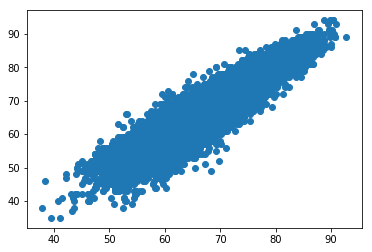

In [22]:
plt.scatter(prediction,y_test)

/home/skull/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


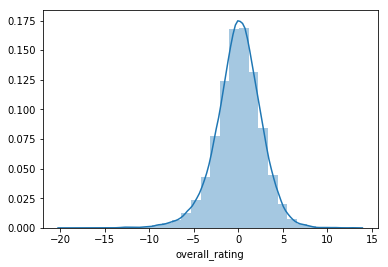

In [31]:
sns.distplot((y_test- prediction),bins=30)